# Monkeypox figures

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify 
import os


path_figs = os.getcwd() +"/../Figures/"

In [78]:
#Load newest data from raw file (Monkeypox_Public_www.global.health)
df = pd.read_csv("https://raw.githubusercontent.com/globaldothealth/monkeypox/main/latest.csv")

In [79]:
df.columns

Index(['ID', 'Status', 'Location', 'City', 'Country', 'Age', 'Gender',
       'Date_onset', 'Date_confirmation', 'Symptoms', 'Hospitalised (Y/N/NA)',
       'Date_hospitalisation', 'Isolated (Y/N/NA)', 'Date_isolation',
       'Outcome', 'Contact_comment', 'Contact_ID', 'Contact_location',
       'Travel_history (Y/N/NA)', 'Travel_history_entry',
       'Travel_history_start', 'Travel_history_location',
       'Travel_history_country', 'Genomics_Metadata', 'Confirmation_method',
       'Notes', 'Source', 'Source_II', 'Date_entry', 'Date_last_modified',
       'Source_III', 'Unnamed: 31'],
      dtype='object')

In [80]:
df["Gender"].value_counts()

male      144
female      3
Name: Gender, dtype: int64

In [81]:
df["Gender"]

0       NaN
1       NaN
2       NaN
3      male
4      male
       ... 
307     NaN
308     NaN
309     NaN
310     NaN
311     NaN
Name: Gender, Length: 312, dtype: object

In [82]:
df

,ID,Status,Location,City,Country,Age,Gender,Date_onset,Date_confirmation,Symptoms,...,Travel_history_country,Genomics_Metadata,Confirmation_method,Notes,Source,Source_II,Date_entry,Date_last_modified,Source_III,Unnamed: 31
0,1,confirmed,Guy's and St Thomas Hospital London,London,England,NaN,NaN,2022-04-29,2022-05-06,rash,...,Nigeria,West African Clade,RT-PCR,NaN,https://www.gov.uk/government/news/monkeypox-c...,https://www.who.int/emergencies/disease-outbre...,2022-05-18,2022-05-18,NaN,NaN
1,2,confirmed,Guy's and St Thomas Hospital London,London,England,NaN,NaN,2022-05-05,2022-05-12,rash,...,NaN,West African Clade,RT-PCR,NaN,https://www.gov.uk/government/news/monkeypox-c...,NaN,2022-05-18,2022-05-18,NaN,NaN
2,3,confirmed,London,London,England,NaN,NaN,2022-04-30,2022-05-13,vesicular rash,...,NaN,West African Clade,RT-PCR,NaN,https://www.gov.uk/government/news/monkeypox-c...,NaN,2022-05-18,2022-05-18,NaN,NaN
3,4,confirmed,London,London,England,NaN,male,NaN,2022-05-15,vesicular rash,...,NaN,West African Clade,NaN,MSM,https://www.gov.uk/government/news/monkeypox-c...,NaN,2022-05-18,2022-05-18,NaN,NaN
4,5,confirmed,London,London,England,NaN,male,NaN,2022-05-15,vesicular rash,...,NaN,West African Clade,NaN,MSM,https://www.gov.uk/government/news/monkeypox-c...,NaN,2022-05-18,2022-05-18,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,308,confirmed,NaN,NaN,Spain,NaN,NaN,NaN,2022-05-24,NaN,...,NaN,NaN,PCR,15 new cases confirmed May 24 (for a total of ...,https://westobserver.com/news/europe/health-ra...,NaN,NaN,NaN,NaN,NaN
308,309,confirmed,NaN,NaN,Spain,NaN,NaN,NaN,2022-05-24,NaN,...,NaN,NaN,PCR,15 new cases confirmed May 24 (for a total of ...,https://westobserver.com/news/europe/health-ra...,NaN,NaN,NaN,NaN,NaN
309,310,confirmed,NaN,NaN,Spain,NaN,NaN,NaN,2022-05-24,NaN,...,NaN,NaN,PCR,15 new cases confirmed May 24 (for a total of ...,https://westobserver.com/news/europe/health-ra...,NaN,NaN,NaN,NaN,NaN
310,311,confirmed,NaN,NaN,Spain,NaN,NaN,NaN,2022-05-24,NaN,...,NaN,NaN,PCR,15 new cases confirmed May 24 (for a total of ...,https://westobserver.com/news/europe/health-ra...,NaN,NaN,NaN,NaN,NaN


### Gender plot

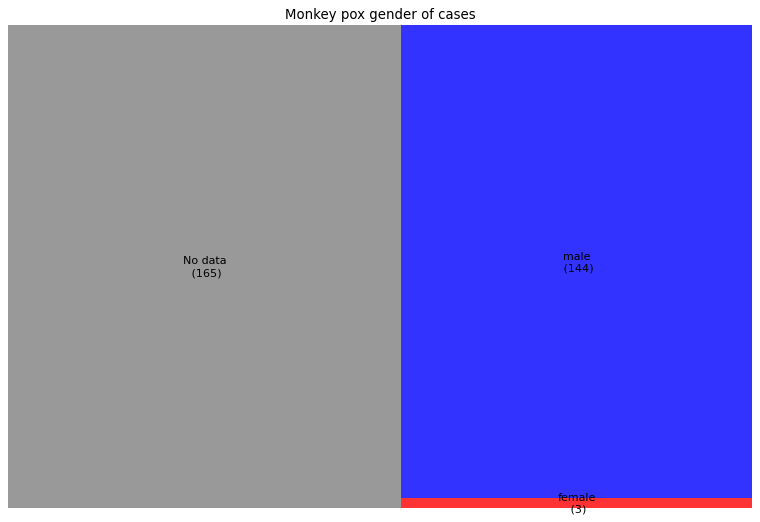

In [84]:
# Prepare Data
df_1 = df
df_1['Gender'] = df_1['Gender'].fillna('No data')
df_1 = df_1.groupby('Gender').size().reset_index(name='counts')
labels = df_1.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df_1['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]
colors = ['grey','r','b']
# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Monkey pox gender of cases')
plt.axis('off')
#plt.show()
plt.savefig(path_figs+f"MonkeyPox_gender", bbox_inches = 'tight')

## Age plot

In [33]:
df_x = df
#df_x['Age'] = df_x['Age'].fillna('No data')
df_x.dropna(subset = ["Age"], inplace=True)

(array([34., 17.,  1.,  3.,  2.,  2.,  2.,  1.,  1.,  3.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

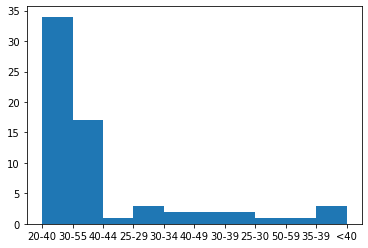

In [34]:
fig, ax = plt.subplots()
ax.hist(df_x['Age'])

In [35]:
df_x['Age'].unique()
#20:'20-40', 
#15:'30-55'
#9: '30-39','40-49', '50-59'
#5: '25-30'
#4:'25-29','30-34','40-44','35-39',<40

array(['20-40', '30-55', '40-44', '25-29', '30-34', '40-49', '30-39',
       '25-30', '50-59', '35-39', '<40'], dtype=object)

In [36]:
df_x["Age"].value_counts()

20-40    34
30-55    17
25-29     3
30-34     2
40-49     2
30-39     2
<40       2
40-44     1
25-30     1
50-59     1
35-39     1
Name: Age, dtype: int64

In [39]:
def intervals2layers(si):
    layers = [[si[0]]]
    for p in si[1:]:
        for lay in layers:
            if lay[-1][-1] < p[0]:
                lay.append(p)
                break
        else:
            layers.append([p])

    return layers

In [62]:
intervals = [(20,40,)*34,(30,55,)*17, (25,49,)*3, (30,34,)*2, (40,49,)*2,(30,39,)*2, (40,60,)*2,(40,44,)*1, (25,30,)*1, (50,59,)*1, (35,39,)*1]

ValueError: too many values to unpack (expected 2)

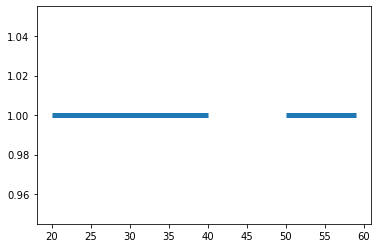

In [64]:
si = sorted(intervals, key=lambda p: p[0])
layers = intervals2layers(si)

for i, lay in enumerate(layers):
    x1, x2 = zip(*lay)
    plt.hlines([i + 1] * len(x1), x1, x2, lw=5)

In [29]:
df_x = df_x[df_x["Age"].str.contains('25-29|30-34|40-44|35-39|<40')==True]

ValueError: could not convert string to float: '40-44'

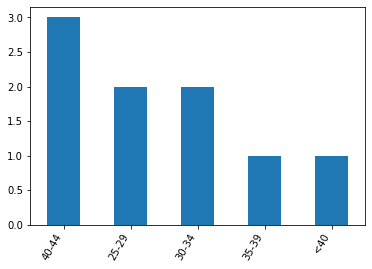

In [18]:
fig, ax = plt.subplots()
df_x['Age'].value_counts().plot(ax=ax, kind='bar')
plt.gca().set_xticklabels(df_x['Age'].unique(), rotation=60, horizontalalignment= 'right')

for i, val in enumerate(df_x['Age'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

C:\Users\CHRIST~1\AppData\Local\Temp/ipykernel_2472/1273694204.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(df['Age'], rotation=60, horizontalalignment= 'right')


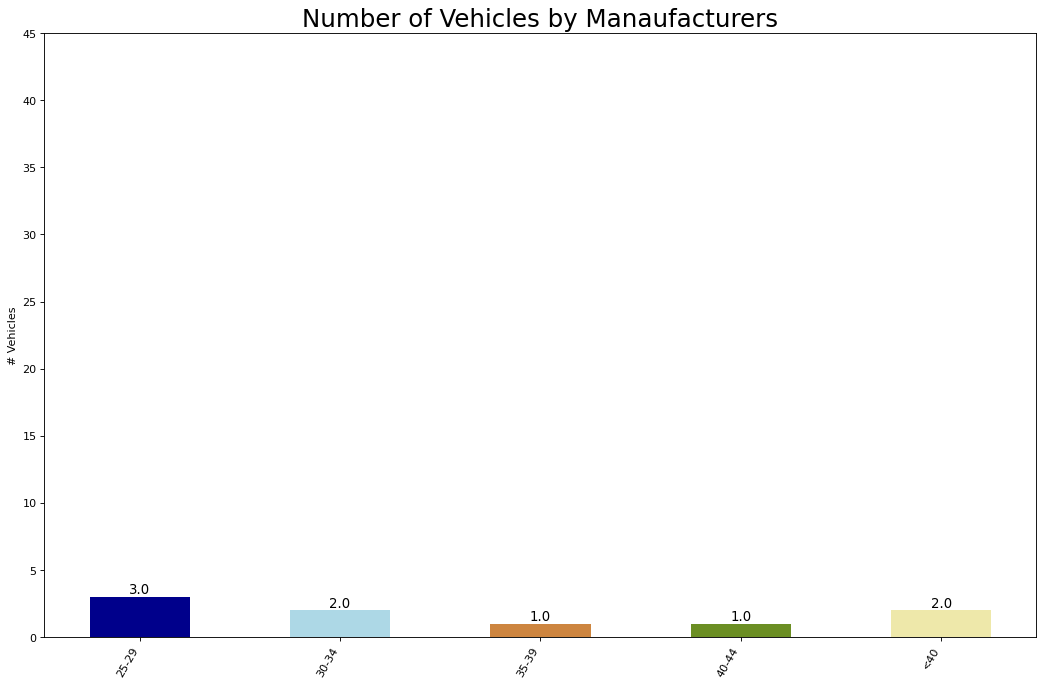

In [19]:


import random

# Import Data
df_raw = df_x

# Prepare Data
df = df_raw.groupby('Age').size().reset_index(name='counts')
n = df['Age'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

# Plot Bars
plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df['Age'], df['counts'], color=c, width=.5)
for i, val in enumerate(df['counts'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

# Decoration
plt.gca().set_xticklabels(df['Age'], rotation=60, horizontalalignment= 'right')
plt.title("Number of Vehicles by Manaufacturers", fontsize=22)
plt.ylabel('# Vehicles')
plt.ylim(0, 45)
plt.show()

